In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv(r'C:\Users\USER\Desktop\packt\ML projects\CODES\1. Simple Linear Regression\code-LR-Teclov (1)\code_LR_Teclov\tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


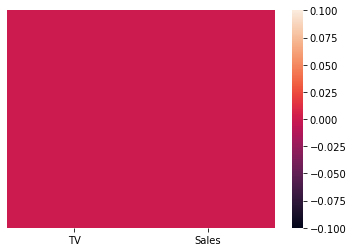

In [4]:
# Check for missing values
sns.heatmap(df.isnull(),yticklabels=False)

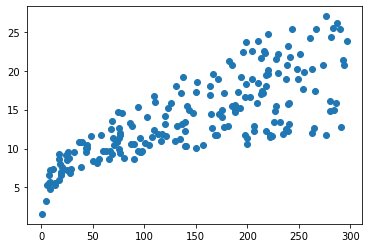

In [7]:
# Check for linear relationship between Sales and TV

plt.scatter(x= df['TV'] , y = df['Sales'])

In [8]:
# Correlation
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


# Data split

In [10]:
import statsmodels.api as sm

X = sm.add_constant(df[['TV']])
y = df['Sales']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# MODEL BUILDING

In [13]:
lm = sm.OLS(y_train,X_train).fit()

# MODEL DIAGNOSIS

In [14]:
print(lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.611   
Dependent Variable: Sales            AIC:                745.2370
Date:               2020-05-03 13:36 BIC:                751.1203
No. Observations:   140              Log-Likelihood:     -370.62 
Df Model:           1                F-statistic:        219.0   
Df Residuals:       138              Prob (F-statistic): 2.84e-30
R-squared:          0.613            Scale:              11.835  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    6.9897      0.5477    12.7625    0.0000    5.9067    8.0726
TV       0.0465      0.0031    14.7982    0.0000    0.0403    0.0527
-----------------------------------------------------------------
Omnibus:               0.995        Durbin-Watson:          1.983
Prob(Omnibus

# RESIDUAL ANALYSIS

Text(0.5, 1.0, 'Normality test')

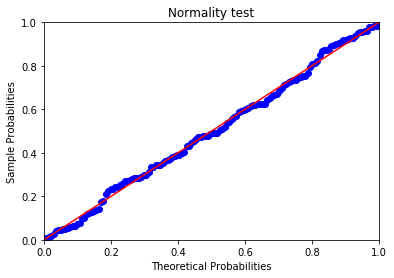

In [15]:
# Check for normal distribution of errors

resid = lm.resid_pearson
x = sm.ProbPlot(resid)
x.ppplot(line='45')
plt.title('Normality test')

Text(0.5, 1.0, 'Test for homoscedasticity')

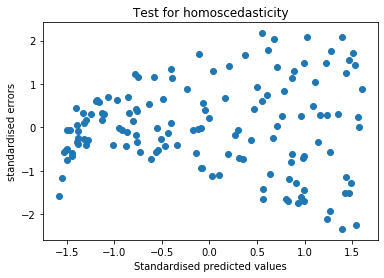

In [17]:
# Test for homoscedasticity

def get_std_values(values):
    return (values-values.mean()) / values.std()

plt.scatter(x = get_std_values(lm.fittedvalues) , y = get_std_values(lm.resid))
plt.xlabel('Standardised predicted values')
plt.ylabel('standardised errors')
plt.title('Test for homoscedasticity')

# PREDICTIONS

In [18]:
pred = lm.predict(X_test)

# ACCURACY

In [20]:
# RMSE

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(round(rmse,3))

2.824


Text(0.5, 0, 'index')

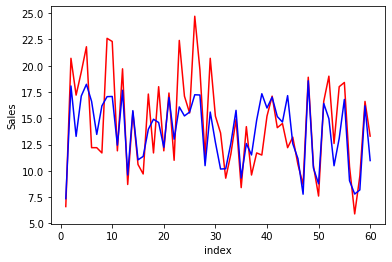

In [23]:
# Actual vs predict

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,'red')
plt.plot(c,pred,'blue')
plt.ylabel('Sales')
plt.xlabel('index')

Text(0.5, 1.0, 'Error terms')

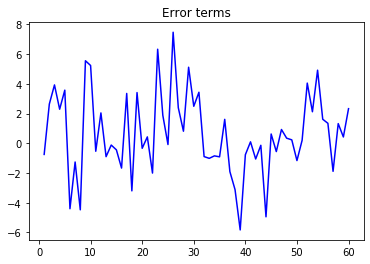

In [24]:
# Error terms

c = [ i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-pred,'blue')
plt.title('Error terms')